In [46]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [47]:
# Read in a part of the data
df_comment = pd.read_csv('LIST_COMMENT_202301131608.csv', nrows=10000, sep = '|')
df_likes = pd.read_csv('LIST_LIKES_202301131657.csv', nrows=10000, sep = '|')
df_mmao = pd.read_csv('LIST_MMAO_202301131613.csv', nrows=10000, sep = '|')
df_newin = pd.read_csv('LIST_NEWIN_202301131612.csv', nrows=10000, sep = '|')
df_transaction = pd.read_csv('LIST_TRANSACTION_202301131625.csv', nrows=10000, sep = '|')

In [48]:
df_comment.head()

,ID_COMMENT,DESCRIPTION,ID_PRODUCT,DATE_COMMENT,DATE_UPDATEDAT,NB_LIKES,ID_CLIENT,ID_BUYER,ID_PRODUCT.1,DEPOSIT_PRICE,PRICE_INSERTION,SELLER_REVENUE,COMMISSION,ID_SELLER,DATE_DEPOSIT,DATE_PUBLISHED,DATE_SOLD,DATE_REJECTED,DATE_WITHDRAWN,SEVEND_SOLD_STATUS,THIRTYD_SOLD_STATUS,NINETYD_SOLD_STATUS,CURRENT_STATUS,STATUS_AFTER_7_DAYS,ACCEPTED_BY,ID_SUPERUSER_STR,CURATION_LEAD_TIME,CURATION_HUB,CURATION_HUB_SUB,ID_MODEL,ID_BRAND,ID_CATEGORY,ID_SUBCATEGORY,SUB_SUBCATEGORY,SEGMENT,UNIVERSE,IS_ONLINE,ID_SELLER_COUNTRY,VINTAGE,LIKES,WISHES,NB_CONSULTATION,NBWISH,DEPOSIT_DEVICE_BRAND,DEPOSIT_DEVICE,DEPOSIT_UTM_SOURCE,DEPOSIT_UTM_MEDIUM,DEPOSIT_CHANNEL,IS_PREMIUM_PRODUCT,IS_PICKING_REQUEST,IS_REFUND_EXTRA,RANK_SOLD,RANK_ACCEPTED,RANK_DEPOSIT,RANK_DEPOSIT_DAY,RANK_WITHDRAWN,RANK_WITHIN_SEGMENT,CURATION_SCORE,LOVED,PRODUCT_NAME,IS_REJECTED,ID_REJECT_REASON,ID_COLOUR,ID_MATERIAL,ID_MATERIAL_TYPE,ID_CONDITION,PHOTO_SMALL,ID_BI_CATEGORY,ID_PAGE,NEED_AUTH,PRODUCT_DESCRIPTION,DEPOSIT_MARKETING_CHANNEL,ID_WAREHOUSE,IS_RESERVED,DEPOSIT_BROWSER,FLAG_DIRECT_SHIPPING,FLAG_DIRECT_SHIPPING_DEPOSIT_DATE,ID_BI_CAT_TREE,MMAO_NB,MMAO_ACTIVATED,ID_PRICE_RANGE_INSERTION,ID_PRICE_RANGE_DEPOSIT,IS_EXCEPTIONAL,ID_PARENT_PRODUCT,CURRENCY,IS_ACTIVE,IS_WITHDRAWN,ID_SIZE,PHOTO_1,PHOTO_2,PHOTO_3,PHOTO_4,PHOTO_5,MODEL,BRAND,CATEGORY,SUBCATEGORY,COLOUR,MATERIAL,CONDITION,SIZE,BI_CATEGORY_MNL,BI_SUBCATEGORY,BRAND_GROUP,BI_BRAND_GROUP,BRAND_GROUP_DETAIL,BI_SUB_SUBCATEGORY_MNL,BI_UNIVERSE_MNL,BI_SUBCATEGORY_MNL,AGE_ONLINE,ID_SELLER_STATE,WAREHOUSE_NAME,PRICE_RANGE_INSERTION,PRICE_RANGE_DEPOSIT,FIFTEEND_SOLD_STATUS,INSTOCK,IS_COUNTERFEIT,IS_AUTHENTIC,ID_LAST_ACTION,IS_CONFORM,IS_NON_CONFORM,ID_STOCK_LOCATION,GEO_1_SELLER,GEO_2_SELLER,ID_SIZE_TYPE,SIZE_TYPE_HEADER,SIZE_TYPE_VALUE,SIZE_TYPE_NAME,IS_VDC_PLUS,FAIR_PRICE,IS_OVERPRICED,DEPOSIT_UTM_ADCONTENT,DEPOSIT_MARKETING_CHANNEL2,DEPOSIT_UTM_CAMPAIGN,HS_CODE,PRODUCT_REFERENCE,IS_HOT_SUPPLY,IS_EVERGREEN_SUPPLY,IS_WARM_SUPPLY,NB_PRICEDROPS,US_SUPPLY_TYPE,ID_PRICE_RANGE_INSERTION_2,ID_PRICE_RANGE_DEPOSIT_2,ID_SUB_SUBCATEGORY,ID_UNIVERSE,IS_SELLER_PAID,DATE_SELLER_PAID,PREDICTED_PRICE,SCORE_RANKING,SCORE_PRICE,SCORE_DESIRABILITY,PRICE_PROBABILITY_30,PRICE_PROBABILITY_40,PRICE_PROBABILITY_50,PRICE_PROBABILITY_60,PRICE_PROBABILITY_70,PRICE_PROBABILITY_80,ASSORTMENT_SCORE,REVISION_PHOTO,INTERNAL_COMMENT,ID_MECHANISM,ID_BRACELET,ID_BOX,NO_IMPORT_EXPORT,IS_NEWIN_LIKED_IN_7DAYS,IS_NEWIN_WISHLISTED_IN_7DAYS,IS_NEWIN_MMAO_IN_7DAYS,IS_NEWIN_COMMENTED_IN_7DAYS,IS_NEWIN_ATC_IN_7DAYS,IS_COUNTERFEIT_CURATION,EXCHANGE_RATE,DATE_BOUGHT_BY_VC,ONED_SOLD_STATUS,TWOD_SOLD_STATUS,THREED_SOLD_STATUS,DEPRECIATED_VALUE,CURRENT_PRICE_AT_DEPOSIT_XR,IS_JEWELLERY,IS_BIJOU,ID_PATTERN,PATTERN,ID_SITE,PVP_EURO_BO,ID_PRODUCT_UNAVAILABILITY_REASON,PRODUCT_UNAVAILABILITY_REASON,NEW_BRAND_GROUP,ID_PRICE_RANGE_INSERTION_3,ID_PRICE_RANGE_DEPOSIT_3,CURATOR_TYPE,IS_LIVE_OVERPRICED,IS_LOVED_AUTO,IS_NON_RECEIVED,BUSINESS_UNIT,LIVE_PRICE_LOCAL_WITH_FX,PRICE_BOUGHT_BY_VC,IS_ITEM_WHITELISTED,RANK_DEPOSIT_OVERALL,STOCK,ID_PRODUCT_NEXT_DEPOSIT,IS_SHIPPED,DATE_SHIPPED,ID_UNAVAILABILITY_REASON,UNAVAILABILITY_REASON,PHOTO_MEDIUM,PHOTO_LARGE,PHOTO_MICRO,PHOTO_NANO,LAST_LOW_PRICE,LIVE_PRICE_ORIGINAL_CURRENCY,LIVE_SALE_PRICE,LIVE_PRICE,DEVICE_CATEGORY,ENV_CHANNEL_BI,OPERATING_VERSION,IS_BEST_DEAL,FLAG_FRAUD,FLAG_EXCLUSION_BPERF,ID_PRODUCT_RELISTED,UPDATEDAT,IS_HOT_SUPPLY_PREVIOUS,REGIONAL_HOT_SUPPLY,IS_TRADESY_MIGRATED
0,81368421,"The size is M. However, It's must run small. S...",13044085,2021-02-12 12:33:34.000,2021-02-12 13:42:03.000,0,4242578,4242578,13044085,66.292135,62.921348,34.831500,14.850690,4242578,2020-11-26 16:38:39.000,2020-11-27 02:01:35.000,2021-02-12 21:25:02.000,NaN,NaN,3,3,1,Accepted,Accepted,2411.0,2411.0,563.0,MIDDLE/STREET CURATION,UNSIGNED,0,2837,12,137,Mini,C2C,women,False,222,0,2,0,0,0,Android,smartphone,(direct),(none),app,False,False,False,23,122,129,1,1291.0,129,3,0,Mini dress,False,NaN,17,46,0,9,13044085-1.jpg,16797,15,False,"La robe est petite. Ta

In [49]:
df_likes.head()

,ID_LIKE,ID_CLIENT,ID_PRODUCT,DATE_LIKED,RANK_LIKE_CLIENT,RANK_LIKE_PRODUCT,ID_BUYER,ID_PRODUCT.1,DEPOSIT_PRICE,PRICE_INSERTION,SELLER_REVENUE,COMMISSION,ID_SELLER,DATE_DEPOSIT,DATE_PUBLISHED,DATE_SOLD,DATE_REJECTED,DATE_WITHDRAWN,SEVEND_SOLD_STATUS,THIRTYD_SOLD_STATUS,NINETYD_SOLD_STATUS,CURRENT_STATUS,STATUS_AFTER_7_DAYS,ACCEPTED_BY,ID_SUPERUSER_STR,CURATION_LEAD_TIME,CURATION_HUB,CURATION_HUB_SUB,ID_MODEL,ID_BRAND,ID_CATEGORY,ID_SUBCATEGORY,SUB_SUBCATEGORY,SEGMENT,UNIVERSE,IS_ONLINE,ID_SELLER_COUNTRY,VINTAGE,LIKES,WISHES,NB_CONSULTATION,NBWISH,DEPOSIT_DEVICE_BRAND,DEPOSIT_DEVICE,DEPOSIT_UTM_SOURCE,DEPOSIT_UTM_MEDIUM,DEPOSIT_CHANNEL,IS_PREMIUM_PRODUCT,IS_PICKING_REQUEST,IS_REFUND_EXTRA,RANK_SOLD,RANK_ACCEPTED,RANK_DEPOSIT,RANK_DEPOSIT_DAY,RANK_WITHDRAWN,RANK_WITHIN_SEGMENT,CURATION_SCORE,LOVED,PRODUCT_NAME,IS_REJECTED,ID_REJECT_REASON,ID_COLOUR,ID_MATERIAL,ID_MATERIAL_TYPE,ID_CONDITION,PHOTO_SMALL,ID_BI_CATEGORY,ID_PAGE,NEED_AUTH,PRODUCT_DESCRIPTION,DEPOSIT_MARKETING_CHANNEL,ID_WAREHOUSE,IS_RESERVED,DEPOSIT_BROWSER,FLAG_DIRECT_SHIPPING,FLAG_DIRECT_SHIPPING_DEPOSIT_DATE,ID_BI_CAT_TREE,MMAO_NB,MMAO_ACTIVATED,ID_PRICE_RANGE_INSERTION,ID_PRICE_RANGE_DEPOSIT,IS_EXCEPTIONAL,ID_PARENT_PRODUCT,CURRENCY,IS_ACTIVE,IS_WITHDRAWN,ID_SIZE,PHOTO_1,PHOTO_2,PHOTO_3,PHOTO_4,PHOTO_5,MODEL,BRAND,CATEGORY,SUBCATEGORY,COLOUR,MATERIAL,CONDITION,SIZE,BI_CATEGORY_MNL,BI_SUBCATEGORY,BRAND_GROUP,BI_BRAND_GROUP,BRAND_GROUP_DETAIL,BI_SUB_SUBCATEGORY_MNL,BI_UNIVERSE_MNL,BI_SUBCATEGORY_MNL,AGE_ONLINE,ID_SELLER_STATE,WAREHOUSE_NAME,PRICE_RANGE_INSERTION,PRICE_RANGE_DEPOSIT,FIFTEEND_SOLD_STATUS,INSTOCK,IS_COUNTERFEIT,IS_AUTHENTIC,ID_LAST_ACTION,IS_CONFORM,IS_NON_CONFORM,ID_STOCK_LOCATION,GEO_1_SELLER,GEO_2_SELLER,ID_SIZE_TYPE,SIZE_TYPE_HEADER,SIZE_TYPE_VALUE,SIZE_TYPE_NAME,IS_VDC_PLUS,FAIR_PRICE,IS_OVERPRICED,DEPOSIT_UTM_ADCONTENT,DEPOSIT_MARKETING_CHANNEL2,DEPOSIT_UTM_CAMPAIGN,HS_CODE,PRODUCT_REFERENCE,IS_HOT_SUPPLY,IS_EVERGREEN_SUPPLY,IS_WARM_SUPPLY,NB_PRICEDROPS,US_SUPPLY_TYPE,ID_PRICE_RANGE_INSERTION_2,ID_PRICE_RANGE_DEPOSIT_2,ID_SUB_SUBCATEGORY,ID_UNIVERSE,IS_SELLER_PAID,DATE_SELLER_PAID,PREDICTED_PRICE,SCORE_RANKING,SCORE_PRICE,SCORE_DESIRABILITY,PRICE_PROBABILITY_30,PRICE_PROBABILITY_40,PRICE_PROBABILITY_50,PRICE_PROBABILITY_60,PRICE_PROBABILITY_70,PRICE_PROBABILITY_80,ASSORTMENT_SCORE,REVISION_PHOTO,INTERNAL_COMMENT,ID_MECHANISM,ID_BRACELET,ID_BOX,NO_IMPORT_EXPORT,IS_NEWIN_LIKED_IN_7DAYS,IS_NEWIN_WISHLISTED_IN_7DAYS,IS_NEWIN_MMAO_IN_7DAYS,IS_NEWIN_COMMENTED_IN_7DAYS,IS_NEWIN_ATC_IN_7DAYS,IS_COUNTERFEIT_CURATION,EXCHANGE_RATE,DATE_BOUGHT_BY_VC,ONED_SOLD_STATUS,TWOD_SOLD_STATUS,THREED_SOLD_STATUS,DEPRECIATED_VALUE,CURRENT_PRICE_AT_DEPOSIT_XR,IS_JEWELLERY,IS_BIJOU,ID_PATTERN,PATTERN,ID_SITE,PVP_EURO_BO,ID_PRODUCT_UNAVAILABILITY_REASON,PRODUCT_UNAVAILABILITY_REASON,NEW_BRAND_GROUP,ID_PRICE_RANGE_INSERTION_3,ID_PRICE_RANGE_DEPOSIT_3,CURATOR_TYPE,IS_LIVE_OVERPRICED,IS_LOVED_AUTO,IS_NON_RECEIVED,BUSINESS_UNIT,LIVE_PRICE_LOCAL_WITH_FX,PRICE_BOUGHT_BY_VC,IS_ITEM_WHITELISTED,RANK_DEPOSIT_OVERALL,STOCK,ID_PRODUCT_NEXT_DEPOSIT,IS_SHIPPED,DATE_SHIPPED,ID_UNAVAILABILITY_REASON,UNAVAILABILITY_REASON,PHOTO_MEDIUM,PHOTO_LARGE,PHOTO_MICRO,PHOTO_NANO,LAST_LOW_PRICE,LIVE_PRICE_ORIGINAL_CURRENCY,LIVE_SALE_PRICE,LIVE_PRICE,DEVICE_CATEGORY,ENV_CHANNEL_BI,OPERATING_VERSION,IS_BEST_DEAL,FLAG_FRAUD,FLAG_EXCLUSION_BPERF,ID_PRODUCT_RELISTED,UPDATEDAT,IS_HOT_SUPPLY_PREVIOUS,REGIONAL_HOT_SUPPLY,IS_TRADESY_MIGRATED
0,233510095,13631180,20123290,2022-01-19 00:37:10.000,34,9,13631180,20123290,1420.118343,1420.118343,704.142012,124.260355,14831323,2021-12-28 22:03:19.000,2021-12-29 12:00:20.000,2022-05-17 14:11:26.000,NaN,NaN,3,3,3,Accepted,Accepted,816.0,816.0,837.0,LUXE CURATION,LUXE 2,0,2,141,59,Shoulder bags,C2C,women,False,222,0,43,4,0,4,iOS,smartphone,vestiairecollective.com,push,app,False,False,False,76,91,93,2,77.0,93,3,0,Leather handbag,False,NaN,14,3,0,9,20123290-1.jpg,1460,59,True,Rare sac ceinture seau Gucci\nMatelaté en cuir...,CRM_AUTO,8,0,NaN,1,0,NaN,39,NaN,8,8,1.0,0,

In [50]:
# Check the common columns of the dataframes
def check_columns(df1, df2):
    int = df1.columns.intersection(df2.columns)
    print('Number of common columns: ',len(int))
    print('Number of columns in df1: ', len(df1.columns))
    print('Number of columns in df2: ', len(df2.columns))

    # Which columns are not in common?
    print('Columns not in common: ', set(df1.columns) - set(df2.columns))
    print('Columns not in common: ', set(df2.columns) - set(df1.columns))

check_columns(df_comment, df_likes)


Number of common columns:  217
Number of columns in df1:  222
Number of columns in df2:  221
Columns not in common:  {'ID_COMMENT', 'DATE_UPDATEDAT', 'DATE_COMMENT', 'DESCRIPTION', 'NB_LIKES'}
Columns not in common:  {'DATE_LIKED', 'RANK_LIKE_PRODUCT', 'RANK_LIKE_CLIENT', 'ID_LIKE'}


In [51]:
df_mmao.head()

,ID_MMAO,ID_PRODUCT,ID_ORDER,ID_BUYER,ID_SELLER,STARTED_BY,ID_STARTED_BY,CLOSED_BY,ID_CLOSED_BY,STILL_OPEN,ORDER_GENERATED,PRICE_SOLD,IS_REPAID,DATE_STARTED,DATE_CLOSED,DATE_ACCEPTED,DATE_1ST_ANSWER_SELLER,DATE_1ST_ANSWER_BUYER,MMAO_DURATION_HRS,SUB_STATUS,STATUS_DESCRIPTION,ID_MMAO_STATUS,ID_ACCEPTED_BY,ACCEPTED_BY,NB_BUYER_OFFERS,NB_SELLER_OFFERS,NB_TOTAL_OFFERS,DISPLAYED_PRICE_WHEN_NEGO_STARTED,MMAO_START_PRICE,LOWEST_PRICE_AGREED_BY_SELLER,HIGHEST_PRICE_AGREED_BY_BUYER,RANK_MMAO_ON_PRODUCT,DATE_UPDATEDAT,PLATFORM_BI,DEVICE_CATEGORY_BI,ID_BUYER.1,ID_PRODUCT.1,DEPOSIT_PRICE,PRICE_INSERTION,SELLER_REVENUE,COMMISSION,ID_SELLER.1,DATE_DEPOSIT,DATE_PUBLISHED,DATE_SOLD,DATE_REJECTED,DATE_WITHDRAWN,SEVEND_SOLD_STATUS,THIRTYD_SOLD_STATUS,NINETYD_SOLD_STATUS,CURRENT_STATUS,STATUS_AFTER_7_DAYS,ACCEPTED_BY.1,ID_SUPERUSER_STR,CURATION_LEAD_TIME,CURATION_HUB,CURATION_HUB_SUB,ID_MODEL,ID_BRAND,ID_CATEGORY,ID_SUBCATEGORY,SUB_SUBCATEGORY,SEGMENT,UNIVERSE,IS_ONLINE,ID_SELLER_COUNTRY,VINTAGE,LIKES,WISHES,NB_CONSULTATION,NBWISH,DEPOSIT_DEVICE_BRAND,DEPOSIT_DEVICE,DEPOSIT_UTM_SOURCE,DEPOSIT_UTM_MEDIUM,DEPOSIT_CHANNEL,IS_PREMIUM_PRODUCT,IS_PICKING_REQUEST,IS_REFUND_EXTRA,RANK_SOLD,RANK_ACCEPTED,RANK_DEPOSIT,RANK_DEPOSIT_DAY,RANK_WITHDRAWN,RANK_WITHIN_SEGMENT,CURATION_SCORE,LOVED,PRODUCT_NAME,IS_REJECTED,ID_REJECT_REASON,ID_COLOUR,ID_MATERIAL,ID_MATERIAL_TYPE,ID_CONDITION,PHOTO_SMALL,ID_BI_CATEGORY,ID_PAGE,NEED_AUTH,PRODUCT_DESCRIPTION,DEPOSIT_MARKETING_CHANNEL,ID_WAREHOUSE,IS_RESERVED,DEPOSIT_BROWSER,FLAG_DIRECT_SHIPPING,FLAG_DIRECT_SHIPPING_DEPOSIT_DATE,ID_BI_CAT_TREE,MMAO_NB,MMAO_ACTIVATED,ID_PRICE_RANGE_INSERTION,ID_PRICE_RANGE_DEPOSIT,IS_EXCEPTIONAL,ID_PARENT_PRODUCT,CURRENCY,IS_ACTIVE,IS_WITHDRAWN,ID_SIZE,PHOTO_1,PHOTO_2,PHOTO_3,PHOTO_4,PHOTO_5,MODEL,BRAND,CATEGORY,SUBCATEGORY,COLOUR,MATERIAL,CONDITION,SIZE,BI_CATEGORY_MNL,BI_SUBCATEGORY,BRAND_GROUP,BI_BRAND_GROUP,BRAND_GROUP_DETAIL,BI_SUB_SUBCATEGORY_MNL,BI_UNIVERSE_MNL,BI_SUBCATEGORY_MNL,AGE_ONLINE,ID_SELLER_STATE,WAREHOUSE_NAME,PRICE_RANGE_INSERTION,PRICE_RANGE_DEPOSIT,FIFTEEND_SOLD_STATUS,INSTOCK,IS_COUNTERFEIT,IS_AUTHENTIC,ID_LAST_ACTION,IS_CONFORM,IS_NON_CONFORM,ID_STOCK_LOCATION,GEO_1_SELLER,GEO_2_SELLER,ID_SIZE_TYPE,SIZE_TYPE_HEADER,SIZE_TYPE_VALUE,SIZE_TYPE_NAME,IS_VDC_PLUS,FAIR_PRICE,IS_OVERPRICED,DEPOSIT_UTM_ADCONTENT,DEPOSIT_MARKETING_CHANNEL2,DEPOSIT_UTM_CAMPAIGN,HS_CODE,PRODUCT_REFERENCE,IS_HOT_SUPPLY,IS_EVERGREEN_SUPPLY,IS_WARM_SUPPLY,NB_PRICEDROPS,US_SUPPLY_TYPE,ID_PRICE_RANGE_INSERTION_2,ID_PRICE_RANGE_DEPOSIT_2,ID_SUB_SUBCATEGORY,ID_UNIVERSE,IS_SELLER_PAID,DATE_SELLER_PAID,PREDICTED_PRICE,SCORE_RANKING,SCORE_PRICE,SCORE_DESIRABILITY,PRICE_PROBABILITY_30,PRICE_PROBABILITY_40,PRICE_PROBABILITY_50,PRICE_PROBABILITY_60,PRICE_PROBABILITY_70,PRICE_PROBABILITY_80,ASSORTMENT_SCORE,REVISION_PHOTO,INTERNAL_COMMENT,ID_MECHANISM,ID_BRACELET,ID_BOX,NO_IMPORT_EXPORT,IS_NEWIN_LIKED_IN_7DAYS,IS_NEWIN_WISHLISTED_IN_7DAYS,IS_NEWIN_MMAO_IN_7DAYS,IS_NEWIN_COMMENTED_IN_7DAYS,IS_NEWIN_ATC_IN_7DAYS,IS_COUNTERFEIT_CURATION,EXCHANGE_RATE,DATE_BOUGHT_BY_VC,ONED_SOLD_STATUS,TWOD_SOLD_STATUS,THREED_SOLD_STATUS,DEPRECIATED_VALUE,CURRENT_PRICE_AT_DEPOSIT_XR,IS_JEWELLERY,IS_BIJOU,ID_PATTERN,PATTERN,ID_SITE,PVP_EURO_BO,ID_PRODUCT_UNAVAILABILITY_REASON,PRODUCT_UNAVAILABILITY_REASON,NEW_BRAND_GROUP,ID_PRICE_RANGE_INSERTION_3,ID_PRICE_RANGE_DEPOSIT_3,CURATOR_TYPE,IS_LIVE_OVERPRICED,IS_LOVED_AUTO,IS_NON_RECEIVED,BUSINESS_UNIT,LIVE_PRICE_LOCAL_WITH_FX,PRICE_BOUGHT_BY_VC,IS_ITEM_WHITELISTED,RANK_DEPOSIT_OVERALL,STOCK,ID_PRODUCT_NEXT_DEPOSIT,IS_SHIPPED,DATE_SHIPPED,ID_UNAVAILABILITY_REASON,UNAVAILABILITY_REASON,PHOTO_MEDIUM,PHOTO_LARGE,PHOTO_MICRO,PHOTO_NANO,LAST_LOW_PRICE,LIVE_PRICE_ORIGINAL_CURRENCY,LIVE_SALE_PRICE,LIVE_PRICE,DEVICE_CATEGORY,ENV_CHANNEL_BI,OPERATING_VERSION,IS_BEST_DEAL,FLAG_FRAUD,FLAG_EXCLUSION_BPERF,ID_PRODUCT_RELISTED,UPDATEDAT,IS_HOT_SUPPLY_PREVIOUS,REGIONAL_HOT_SUPPLY,IS_TRADESY_MIGRATED
0,57348842,25739872,NaN,18306351,12597707.0,seller,2,buyer,1,0,0,NaN,NaN,2022-10-21 09:07:50.000,202

In [52]:
df_newin.head(10)

# ID, ID_CLIENT, DATE_CREATED, VALUE, ID_BUYER, DATE_UPDATEDAT, 

,ID,ID_CLIENT,DATE_CREATED,DELETED,DATE_DELETION,DEVICE,VALUE,RT_EMAIL,RT_PUSH,DATE_UPDATEDAT,ID_BUYER
0,317185212,4007639,2021-06-19 21:02:15.000,0.0,NaN,NaN,"a:2:{s:8:""id_brand"";s:4:""3564"";s:7:""id_page"";s...",1,1,2021-07-21 12:01:25.000,4007639
1,11339304,728078,2014-05-24 10:17:38.000,0.0,NaN,NaN,"a:4:{s:6:""hidden"";s:1:""0"";s:8:""id_brand"";s:3:""...",0,0,2021-07-21 07:49:34.000,728078
2,49541556,763294,2016-11-06 21:43:20.000,0.0,NaN,NaN,"a:6:{s:5:""color"";s:2:""14"";s:8:""id_brand"";a:3:{...",0,0,2021-07-21 08:14:01.000,763294
3,107277804,689535,2019-10-19 09:02:58.000,0.0,NaN,NaN,"a:1:{s:8:""id_brand"";s:4:""5555"";}",0,0,2021-07-21 07:18:25.000,689535
4,11326896,781000,2014-05-23 12:55:36.000,0.0,NaN,NaN,"a:1:{s:16:""id_model_produit"";s:1:""8"";}",0,0,2021-07-21 08:24:26.000,781000
5,8648867,876010,2014-01-29 15:32:37.000,0.0,NaN,NaN,"a:7:{s:5:""color"";s:0:"""";s:8:""id_brand"";s:3:""18...",0,0,2021-07-21 11:16:12.000,876010
6,149674412,8422978,2020-05-04 17:38:57.000,0.0,NaN,NaN,"a:2:{s:6:""search"";s:5:""Ganni"";s:4:""size"";s:1:""...",1,0,2021-07-21 14:59:21.000,8422978
7,62313512,3710263,2017-06-24 21:59:15.000,0.0,NaN,NaN,"a:1:{s:6:""search"";s:13:""Johanna ortiz"";}",1,1,2021-07-21 11:19:34.000,3710263
8,279569854,8178996,2021-03-25 10:32:21.000,0.0,NaN,NaN,"a:4:{s:8:""id_brand"";s:2:""50"";s:16:""id_model_pr...",0,1,2021-07-21 14:20:05.000,8178996
9,107839707,3531305,2019-10-26 18:22:19.000,0.0,NaN,NaN,"a:3:{s:12:""id_condition"";s:1:""3"";s:7:""id_page""...",0,1,2021-07-21 07:20:53.000,3531305


In [53]:
df_newin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              10000 non-null  int64  
 1   ID_CLIENT       10000 non-null  int64  
 2   DATE_CREATED    10000 non-null  object 
 3   DELETED         9999 non-null   float64
 4   DATE_DELETION   670 non-null    object 
 5   DEVICE          378 non-null    object 
 6   VALUE           10000 non-null  object 
 7   RT_EMAIL        10000 non-null  int64  
 8   RT_PUSH         10000 non-null  int64  
 9   DATE_UPDATEDAT  10000 non-null  object 
 10  ID_BUYER        10000 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 859.5+ KB


In [54]:
# convert "DATE_CREATED" AND "DATE_UNDATEDAT" from object to datetime
df_newin['DATE_CREATED'] = pd.to_datetime(df_newin['DATE_CREATED'])
df_newin['DATE_UPDATEDAT'] = pd.to_datetime(df_newin['DATE_UPDATEDAT'])
df_newin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              10000 non-null  int64         
 1   ID_CLIENT       10000 non-null  int64         
 2   DATE_CREATED    10000 non-null  datetime64[ns]
 3   DELETED         9999 non-null   float64       
 4   DATE_DELETION   670 non-null    object        
 5   DEVICE          378 non-null    object        
 6   VALUE           10000 non-null  object        
 7   RT_EMAIL        10000 non-null  int64         
 8   RT_PUSH         10000 non-null  int64         
 9   DATE_UPDATEDAT  10000 non-null  datetime64[ns]
 10  ID_BUYER        10000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 859.5+ KB


In [55]:
# count rows
count_rows = df_newin.count()
count_rows

ID                10000
ID_CLIENT         10000
DATE_CREATED      10000
DELETED            9999
DATE_DELETION       670
DEVICE              378
VALUE             10000
RT_EMAIL          10000
RT_PUSH           10000
DATE_UPDATEDAT    10000
ID_BUYER          10000
dtype: int64

In [56]:
# Find variables with missing value
missing_values = df_newin.isna().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]
missing_values

DEVICE           9622
DATE_DELETION    9330
DELETED             1
dtype: int64

In [57]:
# Fill missing value with 'MISSING'
def preprocessing(data):
    cat_miss = ['DEVICE', "DATE_DELETION", "DELETED"]
    data[cat_miss] = data[cat_miss].fillna(value = 'MISSING')
        
    return data

df_newin = preprocessing(df_newin)
df_newin.head()

,ID,ID_CLIENT,DATE_CREATED,DELETED,DATE_DELETION,DEVICE,VALUE,RT_EMAIL,RT_PUSH,DATE_UPDATEDAT,ID_BUYER
0,317185212,4007639,2021-06-19 21:02:15,0.0,MISSING,MISSING,"a:2:{s:8:""id_brand"";s:4:""3564"";s:7:""id_page"";s...",1,1,2021-07-21 12:01:25,4007639
1,11339304,728078,2014-05-24 10:17:38,0.0,MISSING,MISSING,"a:4:{s:6:""hidden"";s:1:""0"";s:8:""id_brand"";s:3:""...",0,0,2021-07-21 07:49:34,728078
2,49541556,763294,2016-11-06 21:43:20,0.0,MISSING,MISSING,"a:6:{s:5:""color"";s:2:""14"";s:8:""id_brand"";a:3:{...",0,0,2021-07-21 08:14:01,763294
3,107277804,689535,2019-10-19 09:02:58,0.0,MISSING,MISSING,"a:1:{s:8:""id_brand"";s:4:""5555"";}",0,0,2021-07-21 07:18:25,689535
4,11326896,781000,2014-05-23 12:55:36,0.0,MISSING,MISSING,"a:1:{s:16:""id_model_produit"";s:1:""8"";}",0,0,2021-07-21 08:24:26,781000


In [58]:
df_newin.RT_EMAIL.value_counts()

0    6002
1    3998
Name: RT_EMAIL, dtype: int64

In [59]:
df_newin.RT_PUSH.value_counts()

1    6252
0    3748
Name: RT_PUSH, dtype: int64

In [60]:
correlation = df_newin.corr()

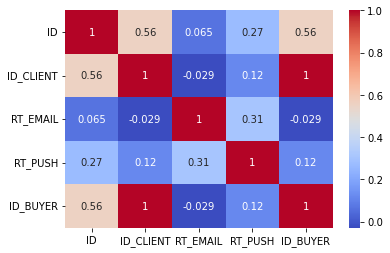

In [61]:
# create the correlation map between each feature
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


In [62]:
df_likes['ID_CLIENT'].equals(df_likes['ID_BUYER'])

True

In [63]:
# ID_CLIENT SAME AS ID_BUYER, SO JUST NEED TO KEEP ONE 
# DROP 'DEVICE', "DATE_DELETION", "DELETED"

df_newin = df_newin[["ID", "ID_CLIENT", "DATE_CREATED", "RT_EMAIL", "RT_PUSH","DATE_UPDATEDAT","VALUE"]]
df_newin.head()

,ID,ID_CLIENT,DATE_CREATED,RT_EMAIL,RT_PUSH,DATE_UPDATEDAT,VALUE
0,317185212,4007639,2021-06-19 21:02:15,1,1,2021-07-21 12:01:25,"a:2:{s:8:""id_brand"";s:4:""3564"";s:7:""id_page"";s..."
1,11339304,728078,2014-05-24 10:17:38,0,0,2021-07-21 07:49:34,"a:4:{s:6:""hidden"";s:1:""0"";s:8:""id_brand"";s:3:""..."
2,49541556,763294,2016-11-06 21:43:20,0,0,2021-07-21 08:14:01,"a:6:{s:5:""color"";s:2:""14"";s:8:""id_brand"";a:3:{..."
3,107277804,689535,2019-10-19 09:02:58,0,0,2021-07-21 07:18:25,"a:1:{s:8:""id_brand"";s:4:""5555"";}"
4,11326896,781000,2014-05-23 12:55:36,0,0,2021-07-21 08:24:26,"a:1:{s:16:""id_model_produit"";s:1:""8"";}"


In [64]:
# create a new column (DATE_UPDATEDAT - DATE_CREATED) how many days btw the created and the last updated date

df_newin['CREATED_DAYS'] = (df_newin['DATE_UPDATEDAT'] - df_newin['DATE_CREATED']).dt.days

In [65]:
df_newin.head()

,ID,ID_CLIENT,DATE_CREATED,RT_EMAIL,RT_PUSH,DATE_UPDATEDAT,VALUE,CREATED_DAYS
0,317185212,4007639,2021-06-19 21:02:15,1,1,2021-07-21 12:01:25,"a:2:{s:8:""id_brand"";s:4:""3564"";s:7:""id_page"";s...",31
1,11339304,728078,2014-05-24 10:17:38,0,0,2021-07-21 07:49:34,"a:4:{s:6:""hidden"";s:1:""0"";s:8:""id_brand"";s:3:""...",2614
2,49541556,763294,2016-11-06 21:43:20,0,0,2021-07-21 08:14:01,"a:6:{s:5:""color"";s:2:""14"";s:8:""id_brand"";a:3:{...",1717
3,107277804,689535,2019-10-19 09:02:58,0,0,2021-07-21 07:18:25,"a:1:{s:8:""id_brand"";s:4:""5555"";}",640
4,11326896,781000,2014-05-23 12:55:36,0,0,2021-07-21 08:24:26,"a:1:{s:16:""id_model_produit"";s:1:""8"";}",2615


In [66]:
df_newin.to_csv('df_newin.csv', index=False)